In [2]:
# This box is for if you want to export a notebook as an HTML report.

from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0){ jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [201]:
from matplotlib.ticker import LogLocator
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Example graph code

## Loading data

In [ ]:
## Unnecessary in this case, but this is the way I like to load my excel sheets
# report = "My_report.xlsx"

In [ ]:
# df_of_specific_sheet = pd.read_excel(open(report, 'rb'), sheet_name='my_sheet')

In [ ]:
## List comprehension is a great way to add new columns (or replace old ones) if you need to reformat your data, 
## or extract info from sample names such as Test_Prep1_purple

# df_of_specific_sheet['New_Percent_Column'] = [s * 100 for s in df_of_specific_sheet.fraction_column_to_be_converted]

In [10]:
# example data for use with graph code
iris = sns.load_dataset("iris")

In [9]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Set up palette and order for later use in graphs

In [12]:
set(iris.species)

{'setosa', 'versicolor', 'virginica'}

In [28]:
iris_palette = { 
    'setosa': "#A3BCF9", 
    'versicolor': "#D1D2F9", 
    'virginica': "#576CA8"
}

In [21]:
iris_order = [ 
    "setosa", 
    "versicolor",
    "virginica"
]

## Graphs

## Box plot with swarm points

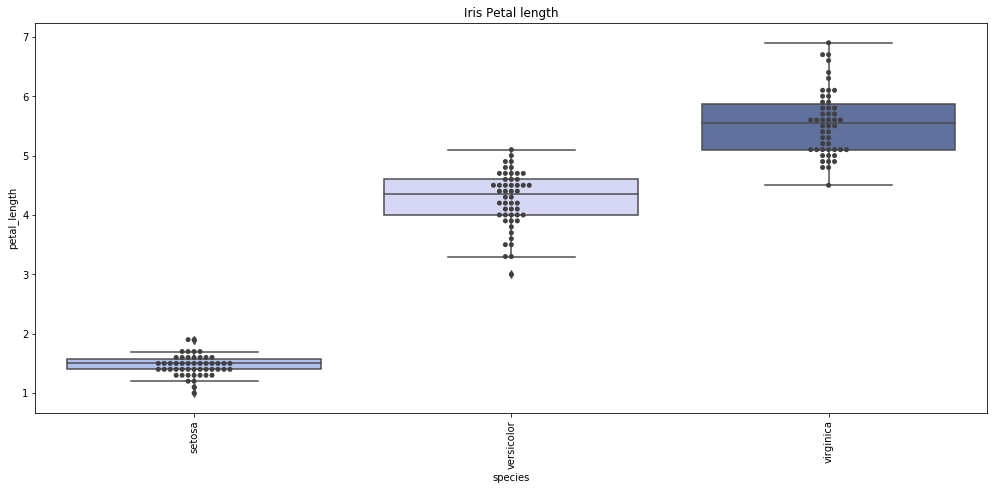

In [29]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=iris, 
    x="species", y="petal_length",
    hue="species", 
    palette=iris_palette, 
    dodge=False,
    order=iris_order
    )
ax = sns.swarmplot(data=iris, 
    x="species", y="petal_length", color=".25",
    order=iris_order
    )
ax.set_title("Iris Petal length")
plt.xticks(rotation=90)
# plt.legend(bbox_to_anchor=(1.08,1), loc="upper left", title="species")
plt.legend().remove()

plt.tight_layout(pad=5)
plt.savefig('Boxplot_iris.png', dpi=300)

plt.show()
plt.close()

## Line & Bar plot with Shared x axis

* This is useful for plotting GC coverage in NGS. 
* Also would be great for climate plots - temperatures at various times of the year. 

In [17]:
flights = sns.load_dataset("flights")

In [39]:
flights.head(24)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


Adding a random extra column to the flights df so that we can have 2 different variables to put on the y axis... Don't think this is a graph you would ever really plot! :) Clouds & passengers over the year??? 

In [67]:
flights['clouds'] = np.random.normal(10, 5, flights.shape[0]) 

In [68]:
flights

,year,month,passengers,clouds
0,1949,January,112,3.027359
1,1949,February,118,21.122203
2,1949,March,132,19.922860
3,1949,April,129,12.979214
4,1949,May,121,13.086957
...,...,...,...,...
139,1960,August,606,14.762387
140,1960,September,508,10.945473
141,1960,October,461,7.261629
142,1960,November,390,1.927403


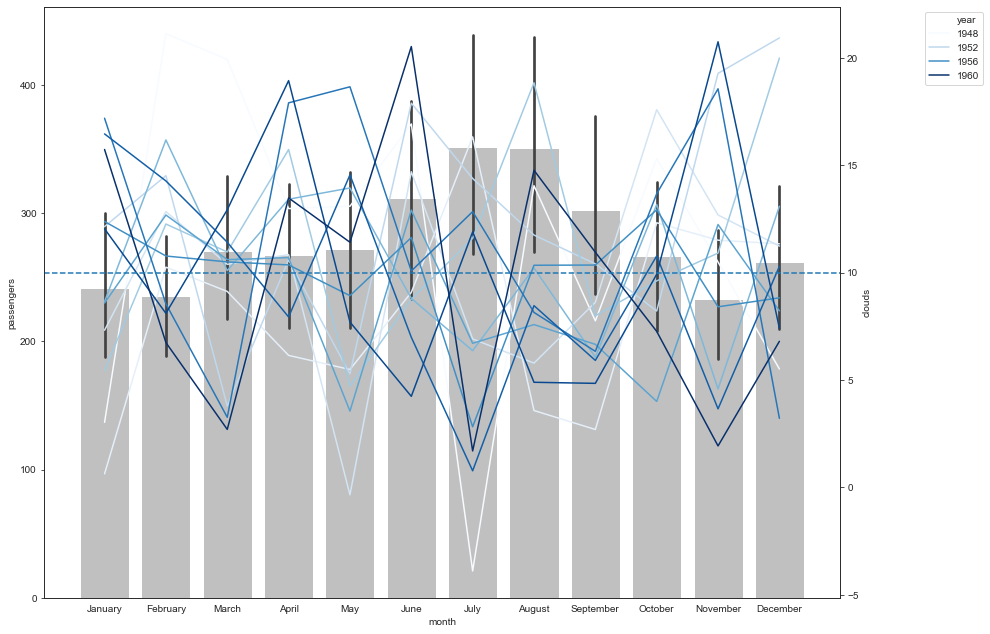

In [80]:
sns.set_style("white")
fig, ax1 = plt.subplots(figsize=(15,10))

# 1 - bar plot creation
ax1 = sns.barplot(x="month", y="passengers", data=flights, color="silver")

# 2 - line plot creation (must be 2nd to go on top)
ax2 = ax1.twinx() #specify we want to share the same x-axis
# ax2.set_title('B. pertussis: GC Coverage Distibution')
ax2 = sns.lineplot(x="month", y="clouds",
            hue="year", palette="Blues",
            # style="year",  # only possible when <= 6
            data=flights)


# x = np.arange(0, 101, 5) # gives you x ticks from 0 to 100 in steps of 5 
# ax2.set_xticks(x) # adds ticks
# ax2.set_xticklabels(x) # adds tick labels
ax2.axhline(10, ls='--') # Adds a horizontal line at x=1
# ax2.set_ylim(-0.5, 2.5) # Sets y limits, thus zooming the graph


### If your data is out of order and you need to rearrange the key for the line graph to make it easier to read
# handles, labels = ax2.get_legend_handles_labels()
# print(handles)
# print(labels)
# order = [0, 4, 5, 7, 6, 1, 2, 3, ] #change order here as needed - see https://www.statology.org/matplotlib-legend-order/

# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1.10,1), loc="upper left")


plt.legend(bbox_to_anchor=(1.10,1), loc="upper left")


plt.tight_layout(pad=5)
plt.savefig('Bar_and_line_graph.png', dpi=300)

plt.show()
plt.close()

## Just a good old line graph

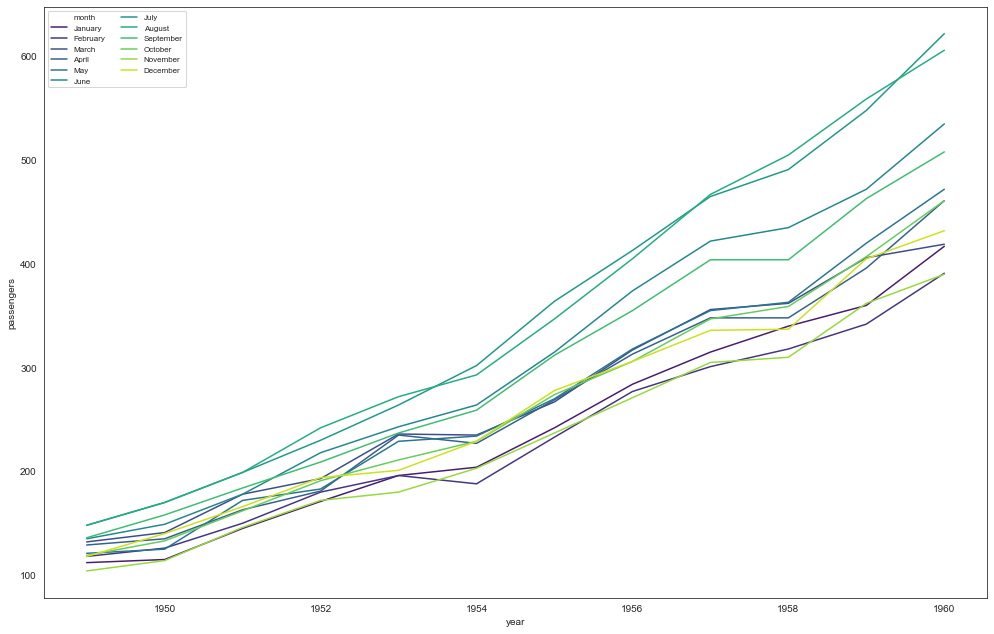

In [88]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(data=flights, x="year", y="passengers", 
    hue="month", palette="viridis")
plt.legend(fontsize=8, ncol=2)
plt.tight_layout(pad=5)
# plt.savefig('Line_graph.png', dpi=300)
plt.show()
plt.close()

## Bar graph with groupings

In [19]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [82]:
set(penguins.species)

{'Adelie', 'Chinstrap', 'Gentoo'}

In [83]:
set(penguins.island)

{'Biscoe', 'Dream', 'Torgersen'}

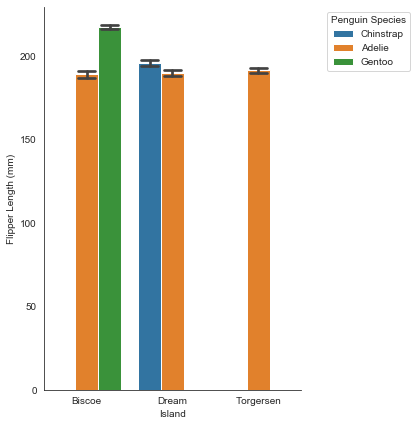

In [87]:
g = sns.catplot(
    data=penguins, x="island", y="flipper_length_mm", 
    kind="bar",dodge=True,
    hue="species", #palette=palette, 
    ci=95, capsize=.2, height=6, #alpha=.8,
    order=['Biscoe', 'Dream', 'Torgersen'],
    hue_order=["Chinstrap", "Adelie", "Gentoo"], legend=None
)
g.set_ylabels("Flipper Length (mm)")
g.set_xlabels("Island")
plt.legend(bbox_to_anchor=(1.08,1), loc="upper left", title="Penguin Species")

plt.tight_layout(pad=1)
# plt.savefig('Grouped_bargraph.png', dpi=300)

plt.show()
plt.close()


## Horizontal bar graph

<Figure size 1080x720 with 0 Axes>

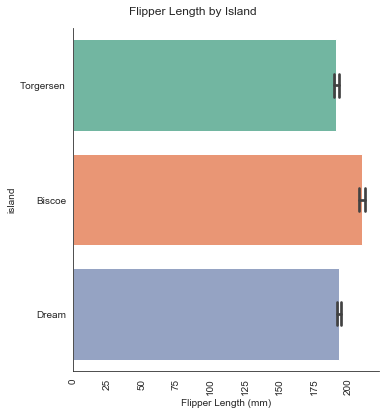

In [94]:
plt.figure(figsize=(15,10))
g = sns.catplot(
    data=penguins, x="flipper_length_mm", y="island", 
    kind="bar",dodge=False,
    hue="island", palette="Set2", 
    ci=95, capsize=.2, height=6, legend=None,
    #order=order, 
)
g.set_xlabels("Flipper Length (mm)")
g.fig.suptitle("Flipper Length by Island")
plt.tight_layout(pad=3)
plt.xticks(rotation=90)

# plt.savefig('Horizontal_Barchart.png', dpi=300)

plt.show()
plt.close()

## Subplots barplot

In [188]:
set(penguins.island)

{'Biscoe', 'Dream', 'Torgersen'}

In [189]:
island_palette = { 
    "Biscoe": "#B719EA",
    "Dream": "#4F19EA",
    "Torgersen": "#EA19B4"
}

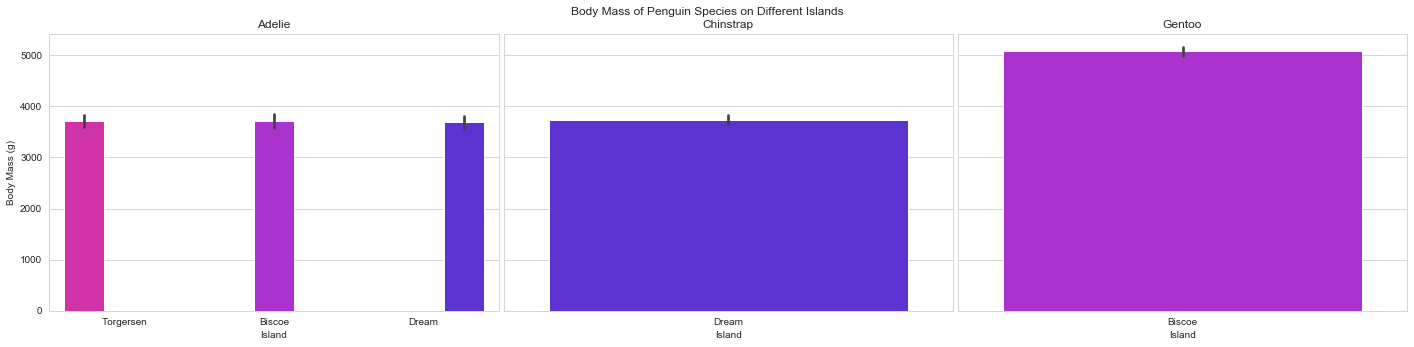

In [193]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle("Body Mass of Penguin Species on Different Islands", y=0.98)

ax = sns.barplot(data=penguins[penguins.species=="Adelie"], ax = axes[0],
    x="island", y="body_mass_g", hue="island", palette=island_palette)
# ax.set_xticklabels(libraries(penguins[penguins.species=="Adelie"]), rotation=90)
ax.set_title("Adelie")
ax.xaxis.set_label_text("Island")
ax.yaxis.set_label_text("Body Mass (g)")

ax1 = sns.barplot(data=penguins[penguins.species=="Chinstrap"], ax = axes[1],
    x="island", y="body_mass_g", hue="island", palette=island_palette)
# ax1.set_xticklabels(libraries(penguins[penguins.species=="Chinstrap"]), rotation=90)
ax1.set_title("Chinstrap")
ax1.xaxis.set_label_text("Island")
ax1.yaxis.set_label_text("")

# Remove all the multiple legends for the first 2 graphs
for ax in axes:
    ax.legend([],[], frameon=False)

ax2 = sns.barplot(data=penguins[penguins.species=="Gentoo"], ax = axes[2],
    x="island", y="body_mass_g", hue="island", palette=island_palette)
# ax2.set_xticklabels(libraries(penguins[penguins.species=="Gentoo"]), rotation=90)
ax2.set_title("Gentoo")
ax2.xaxis.set_label_text("Island")
ax2.yaxis.set_label_text("")

# Add legend to top RHS of far right plot which will serve for all plots. 
# plt.legend(bbox_to_anchor=(1.08,1), loc="upper left", title="species") # needs some work to include all colours

plt.legend().remove()

plt.tight_layout(pad=2, w_pad=0.5, h_pad=2.0)
# plt.savefig('10_Ristows_GC.png', dpi=300)

plt.show()
plt.close()

## Multiple relational (scatter/line) plot

No handles with labels found to put in legend.


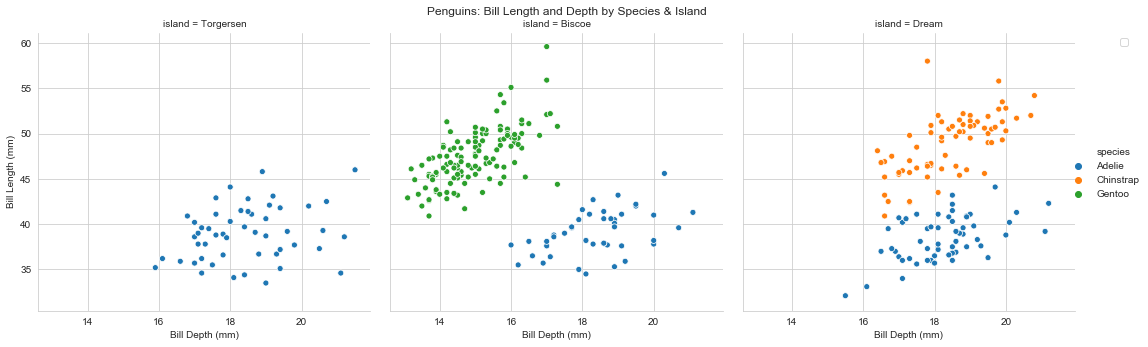

In [125]:
sns.set_style("whitegrid")

g = sns.relplot(x="bill_depth_mm", y="bill_length_mm",
            hue="species", kind="scatter",
            data=penguins, col="island", col_wrap=3, legend="full"
           )
g.set_xlabels('Bill Depth (mm)')
g.set_ylabels('Bill Length (mm)')
g.fig.subplots_adjust(top=0.87, hspace = 0.2, wspace=0.1) 
# smaller _top_ value takes title higher up by controlling position
# _hspace_ & _wspace_ quantify whitespace between plots (h = height; w = width)
g.fig.suptitle("Penguins: Bill Length and Depth by Species & Island")
# leg = g._legend
plt.legend(bbox_to_anchor=(1.12,1), loc="upper left")


plt.tight_layout(pad=2)
# plt.savefig('Multi_relplot.png', dpi=300)
plt.show()
plt.close()

## Stacked bar graph

In [100]:
stack_df = pd.DataFrame({'Name': ["Mary", "Joe", "Sam", "Suzy"], 'Groceries_%': [50, 20, 30, 35], "Rent_%": [40, 60, 30, 35], "Entertainment_%": [5, 10, 10, 10], "Savings_%":[5, 10, 30, 20]})

In [101]:
stack_df

,Name,Groceries_%,Rent_%,Entertainment_%,Savings_%
0,Mary,50,40,5,5
1,Joe,20,60,10,10
2,Sam,30,30,10,30
3,Suzy,35,35,10,20


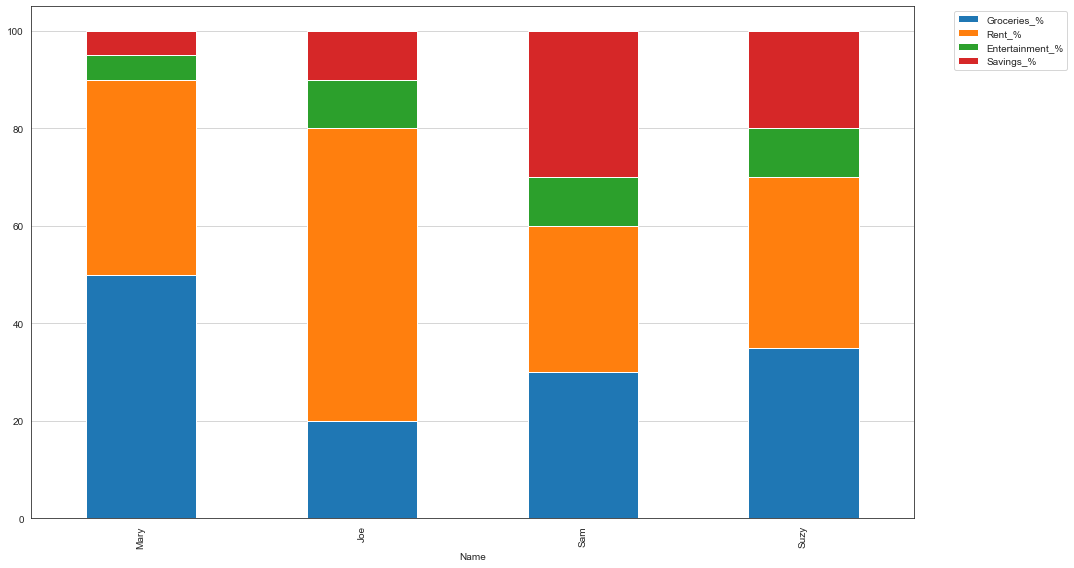

In [104]:
sns.set_style(style=None, rc=None)
ax = stack_df.set_index('Name').plot(kind='bar', stacked=True, 
figsize=(15,8))
ax.grid(axis='y')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
# x = np.arange(len(stack_df))
# ax.set_xticks(x)
# ax.set_xticklabels(libraries(input_data), rotation=90)
# ax.xaxis.set_label_text("Library")
# ax.yaxis.set_label_text("% Reads at each stage of trimming")
# ax.set_title("Reads: Trimmed & Remaining")
plt.tight_layout()
# ax.figure.savefig('Stacked_Bargraph.png', dpi=300)
plt.show()
plt.close() 

### Changing the order of bars in a stacked bar graph

In [105]:
stack_sorter_df = pd.DataFrame({
    'Name': [
 'Joe', 
 'Sam',
 'Suzy',
 'Mary',
],
    'num': [0, 1, 2, 3]})
sort_stack_df = pd.merge(stack_df.copy(), stack_sorter_df, on='Name')
sort_stack_df = sort_stack_df.sort_values('num')
sort_stack_df.drop('num', axis=1, inplace=True)
sort_stack_df

,Name,Groceries_%,Rent_%,Entertainment_%,Savings_%
1,Joe,20,60,10,10
2,Sam,30,30,10,30
3,Suzy,35,35,10,20
0,Mary,50,40,5,5


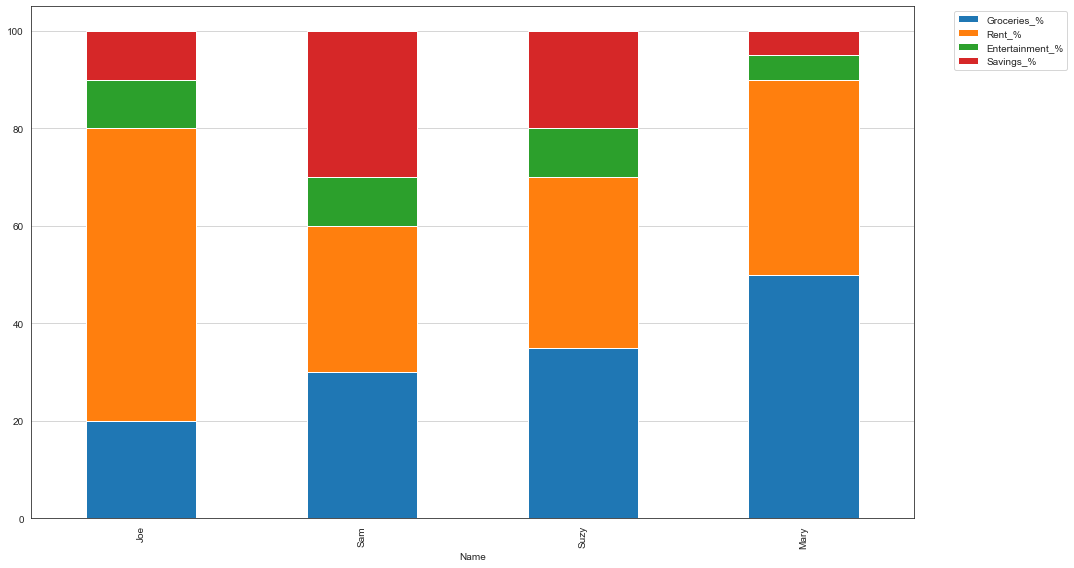

In [107]:
sns.set_style(style=None, rc=None)
ax = sort_stack_df.set_index('Name').plot(kind='bar', stacked=True, 
figsize=(15,8))
ax.grid(axis='y')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
# ax.figure.savefig('Ordered_Stacked_Bargraph.png', dpi=300)
plt.show()
plt.close() 

## Heatmap

In [194]:
flights

,year,month,passengers,clouds
0,1949,January,112,3.027359
1,1949,February,118,21.122203
2,1949,March,132,19.922860
3,1949,April,129,12.979214
4,1949,May,121,13.086957
...,...,...,...,...
139,1960,August,606,14.762387
140,1960,September,508,10.945473
141,1960,October,461,7.261629
142,1960,November,390,1.927403


In [195]:
heatmap_table_flights = flights.copy().pivot(index="year", columns="month", values="passengers")

In [212]:
heatmap_table_flights = flights.copy().pivot(index="month", columns="year", values="passengers")

In [213]:
# First need a table that will be converted to a heatmap (think of colouring each cell of the table to come up with your heatmap)
heatmap_table_flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


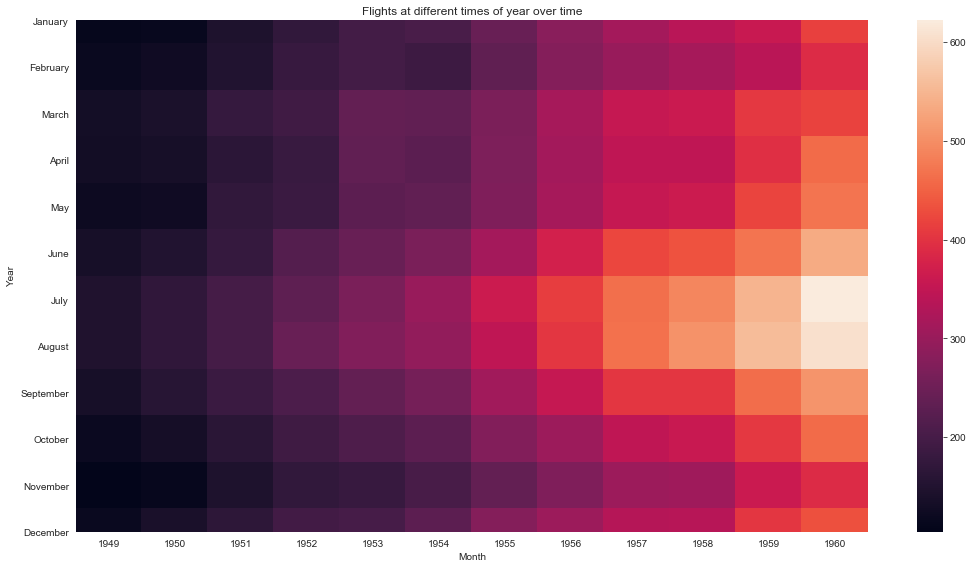

In [216]:
plt.figure(figsize=(15, 8))
ax = sns.heatmap(data=heatmap_table_flights, xticklabels=True, yticklabels=True)
ax.set_title("Flights at different times of year over time")
ax.yaxis.set_label_text("Year")
ax.xaxis.set_label_text("Month")
plt.tight_layout()
# plt.savefig('Heatmap.png', dpi=300)
plt.show()
plt.close()

### Heatmap with log scale

The flights dataset isn't really the best one to show a logscale graph since it doesn't need it (the heatmap above shows the variation in the data much better) - will see if I can update this with a better sample dataset in future.  

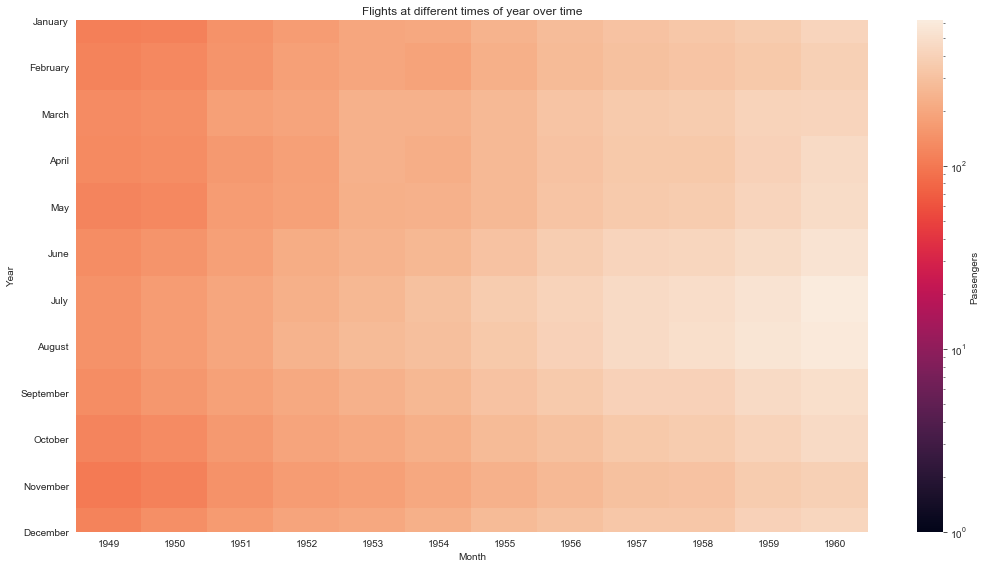

In [217]:
plt.figure(figsize=(15, 8))
logmax = (max(flights["passengers"]))
ax = sns.heatmap(data=heatmap_table_flights, xticklabels=True,  vmin=1.0, vmax=logmax, 
    norm=LogNorm(vmin=1.0, vmax=logmax), cbar_kws={'ticks':LogLocator(base=10.0), 'label': 'Passengers'})
ax.xaxis.set_label_text("Month")
ax.yaxis.set_label_text("Year")
ax.set_title("Flights at different times of year over time")
plt.tight_layout()
# plt.savefig('Logscale_heatmap.png', dpi=300)
plt.show()
plt.close()

## Rearranging dataframes

In [139]:
budget_df = stack_df.set_index("Name")

In [140]:
budget_df

,Groceries_%,Rent_%,Entertainment_%,Savings_%
Name,,,,
Mary,50,40,5,5
Joe,20,60,10,10
Sam,30,30,10,30
Suzy,35,35,10,20


In [141]:
budget_df.columns.name = 'budget_category' # give the column names that will be stacked their own name
s = budget_df.stack() # do stack 
s.name = 'percentage' # name for new column (here the vlues from each base col)
# s.reset_index() # make new df with specified col names

In [113]:
budget_long = s.reset_index()

In [114]:
budget_long

,Name,budget_category,percentage
0,Mary,Groceries_%,50
1,Mary,Rent_%,40
2,Mary,Entertainment_%,5
3,Mary,Savings_%,5
4,Joe,Groceries_%,20
5,Joe,Rent_%,60
6,Joe,Entertainment_%,10
7,Joe,Savings_%,10
8,Sam,Groceries_%,30
9,Sam,Rent_%,30


## Adding data from one dataframe to a related dataframe using a dictionary

In [126]:
favourites_df = pd.DataFrame({ "Names": ["Mary", "Joe", "Suzy", "Sam"], "Colour": ["blue", "green", "pink", "blue"], "Food": ["Pizza", "Pasta", "Salad", "Cake"]})

In [127]:
favourites_df

,Names,Colour,Food
0,Mary,blue,Pizza
1,Joe,green,Pasta
2,Suzy,pink,Salad
3,Sam,blue,Cake


In [145]:
# Obviously if you've made your own teeny df using a dict you don't actually need to do this. But this is really handy for dealing with big dataframes that you read in
favourites_dict = favourites_df.set_index('Names').to_dict()

In [147]:
favourites_dict

{'Colour': {'Mary': 'blue', 'Joe': 'green', 'Suzy': 'pink', 'Sam': 'blue'},
 'Food': {'Mary': 'Pizza', 'Joe': 'Pasta', 'Suzy': 'Salad', 'Sam': 'Cake'}}

In [151]:
favourites_dict["Colour"]

{'Mary': 'blue', 'Joe': 'green', 'Suzy': 'pink', 'Sam': 'blue'}

In [153]:
girls_data_df

budget_category,Groceries_%,Rent_%,Entertainment_%,Savings_%
Name,,,,
Mary,50,40,5,5
Joe,20,60,10,10
Sam,30,30,10,30
Suzy,35,35,10,20


In [157]:
girls_data_df = stack_df.copy()
girls_data_df["Colour"] = girls_data_df["Name"].map(favourites_dict["Colour"])
girls_data_df["Food"] = girls_data_df["Name"].map(favourites_dict["Food"])


In [158]:
girls_data_df

,Name,Groceries_%,Rent_%,Entertainment_%,Savings_%,Colour,Food
0,Mary,50,40,5,5,blue,Pizza
1,Joe,20,60,10,10,green,Pasta
2,Sam,30,30,10,30,blue,Cake
3,Suzy,35,35,10,20,pink,Salad


# Stats

In [168]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [169]:
set(iris.species)

{'setosa', 'versicolor', 'virginica'}

In [170]:
stats.f_oneway(
                iris[iris.species=="setosa"]["sepal_length"],
                iris[iris.species=="versicolor"]["sepal_length"],
                iris[iris.species=="virginica"]["sepal_length"],
                )

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [174]:
print(pairwise_tukeyhsd(iris["sepal_length"], iris["species"]))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93 0.001 0.6862 1.1738   True
    setosa  virginica    1.582 0.001 1.3382 1.8258   True
versicolor  virginica    0.652 0.001 0.4082 0.8958   True
---------------------------------------------------------


A one-way ANOVA showed that there was a statistically significant difference in sepal length 

(F=119.26450218450468, p = 1.6696691907693826e-31) between at least two species. 

A post-hoc Tukey’s HSD Test for multiple comparisons found that the mean recall was significantly different 

between the setosa and virginica species (p=0.001, 95% C.I. = [1.3382, 1.8258]).